In [34]:
import pandas as pd

df = pd.read_csv("clover_random_test.csv")
df

,testname,git_hash,git_committer,git_committed_date,git_repo_name,version,Task Count,Thread Count,x_cells,y_cells,...,Cell Advection,Momentum Advection,Reset,Summary,Visit,Tile Halo Exchange,Self Halo Exchange,MPI Halo Exchange,Total,The Rest
0,random_test,0fdb917bf10d20363dd8b88d762851908643925b,caxwl,2021-08-09,UK-MAC/CloverLeaf_ref,1.3,4,4,960,960,...,0.1369,0.3139,0.0339,0.0022,0.0,0.0001,0.2134,0.5226,1.6218,0.0003
1,random_test,1398cd9cfa7570db9c8eb7a17a2f3e698c90aeb4,GitHub,2021-08-03,UK-MAC/CloverLeaf_ref,1.3,4,4,960,960,...,0.1288,0.3257,0.0311,0.0016,0.0,0.0002,0.2176,0.4954,1.5844,0.0003
2,random_test,158e23d08f73d36f71e144851451955b3ae02dff,mohan002,2021-08-03,UK-MAC/CloverLeaf_ref,1.3,4,4,960,960,...,0.1369,0.3030,0.0323,0.0021,0.0,0.0002,0.2011,0.5384,1.6110,0.0003
3,random_test,2efdde26ab1eef67dfce5a29163e8d513b6dffc4,jdshanks,2020-08-20,UK-MAC/CloverLeaf_ref,1.3,4,4,960,960,...,0.1439,0.2851,0.0389,0.0069,0.0,0.0003,0.1667,0.5370,1.6048,0.0003
4,random_test,89cc919b28f687a25d30b44ddf547201da930c14,jdshanks,2020-07-14,UK-MAC/CloverLeaf_ref,1.3,4,4,960,960,...,0.1242,0.3041,0.0302,0.0019,0.0,0.0001,0.2165,0.5463,1.6025,0.0003
5,random_test,07fcf4d773ba7626e6ea36c7002f7b2cd7c76b2a,jdshanks,2020-07-14,UK-MAC/CloverLeaf_ref,1.3,4,4,960,960,...,0.1417,0.2957,0.0383,0.0049,0.0,0.0002,0.1820,0.5184,1.5957,0.0003
6,random_test,e37e1d7aab99070a65094e784721b4d05fb86444,jdshanks,2020-07-14,UK-MAC/CloverLeaf_ref,1.3,4,4,960,960,...,0.1337,0.3068,0.0330,0.0020,0.0,0.0001,0.1939,0.5274,1.5960,0.0003
7,random_test,439c8d846ede012c89f7be451763a32dbaa5eb2c,GitHub,2020-07-13,UK-MAC/CloverLeaf_ref,1.3,4,4,3840,3840,...,2.3710,4.9192,0.5662,0.0367,0.0,0.0003,0.8092,0.9885,15.6531,0.0005
8,random_test,3f889495db94c6fba5a5ec1f9937f49e8b66f94d,Olly Perks,2020-07-13,UK-MAC/CloverLeaf_ref,1.3,4,4,3840,3840,...,2.3394,4.9349,0.5455,0.0372,0.0,0.0003,0.7951,1.0069,15.6668,0.0009
9,random_test,b5e598dc0f10ca804dce4a748e3c2314545269cd,GitHub,2020-07-03,UK-MAC/CloverLeaf_ref,1.3,4,4,3840,3840,...,2.3405,4.9103,0.5517,0.0298,0.0,0.0003,0.8212,1.0441,15.6725,0.0004


In [35]:
print([substring[:7] for substring in df["git_hash"]])

['0fdb917', '1398cd9', '158e23d', '2efdde2', '89cc919', '07fcf4d', 'e37e1d7', '439c8d8', '3f88949', 'b5e598d', '821792e', '34869cb']


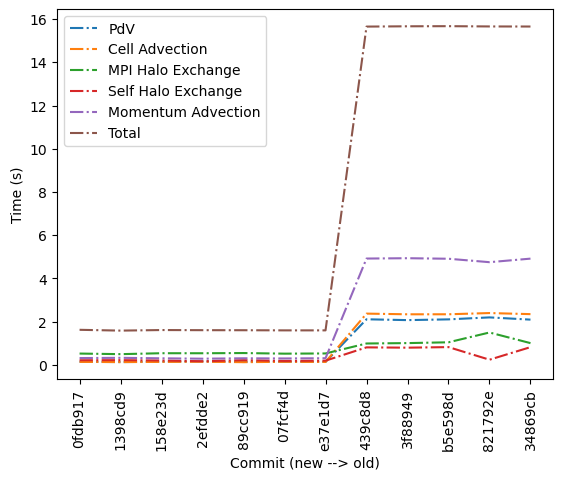

In [57]:
from ipywidgets import *
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib.pyplot as plt

# ax = sns.lineplot(data=df[["PdV", "Cell Advection", "MPI Halo Exchange", "Self Halo Exchange", "Momentum Advection", "Total"]])
# ax.set_xticklabels([substring[:7] for substring in df["git_hash"]])
# ax.set_xlabel("Commit")
# ax.set_ylabel("Time (s)")
# ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
# plt.xticks(rotation=90)
sh_hash = [substring[:7] for substring in df["git_hash"]]
for col in ["PdV", "Cell Advection", "MPI Halo Exchange", "Self Halo Exchange", "Momentum Advection", "Total"]:
    plt.plot(sh_hash, df[col], label=col, linestyle='dashdot')
plt.xticks(rotation=90)
plt.xlabel("Commit (new --> old)")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

In [58]:
def create_git_comapre_link(df, row1, row2):
    return "https://github.com/" + df.iloc[row1]["git_repo_name"] + "/compare/" + df.iloc[row1]["git_hash"][:7] + ".." + df.iloc[row2]["git_hash"][:7]

# https://github.com/UK-MAC/CloverLeaf_ref/compare/e37e1d7..439c8d8 (old .. new)
create_git_comapre_link(df, 7,6)

'https://github.com/UK-MAC/CloverLeaf_ref/compare/439c8d8..e37e1d7'